In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd /content/drive/MyDrive/UH_chatbot/

/content/drive/MyDrive/UH_chatbot


In [ ]:
!git config --global user.email "ayeolaainahalimat@gmail.com"
!git config --global user.name "Halimat92"


In [9]:
pwd

'/content/drive/MyDrive/UH_chatbot'

In [11]:
!git clone https://github.com/Halimat92/Agentic-RAG-with-vector-DB.git


Cloning into 'Agentic-RAG-with-vector-DB'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 630.47 KiB | 13.13 MiB/s, done.


In [ ]:
!pip install requests beautifulsoup4
!pip install -U langchain-community
!pip install chromadb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 5.5 MB/s eta 0:00:00


In [14]:
!ls

Agentic-RAG-with-vector-DB  chroma_db	 images
app.py			    course_data  requirements.txt


In [12]:
!cp UH_Chatbot.ipynb Agentic-RAG-with-vector-DB/


cp: cannot stat 'UH_Chatbot.ipynb': No such file or directory


In [13]:
!cp UH_Chatbot.ipynb /content/drive/MyDrive/UH_chatbot


cp: cannot stat 'UH_Chatbot.ipynb': No such file or directory


In [ ]:
%cd your-repo-name/
!git add UH Chatbot.ipynb
!git commit -m "Add energy forecasting notebook from Google Drive"
!git push https://github.com/Halimat92/Agentic-RAG-with-vector-DB.git main


In [ ]:
pwd

'/content/drive/MyDrive/course_advisor_chatbot'

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import time
import os
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import time
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document
import os
import re
import os
from typing import List
from langchain.schema import Document

In [ ]:


# Target URL
url = 'https://www.herts.ac.uk/courses/postgraduate-masters-study/computer-science-ai-robotics'

# Send a GET request
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Check for success
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all course links (change this selector based on actual HTML)
    course_links = soup.select('a[href*="/courses/"]')

    courses = []
    for link in course_links:
        title = link.get_text(strip=True)
        href = link['href']
        full_url = 'https://www.herts.ac.uk' + href if href.startswith('/') else href
        courses.append((title, full_url))

    # Save to CSV
    with open('courses.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Course Title', 'URL'])
        writer.writerows(courses)

    print(f" Saved {len(courses)} course(s) to 'courses.csv'")

else:
    print(f" Failed to retrieve page. Status code: {response.status_code}")

 Saved 56 course(s) to 'courses.csv'


In [ ]:

# Step 1: Read URLs from CSV
df = pd.read_excel('/content/drive/MyDrive/chatbot_project/course_data.xlsx')
urls = df['URL'].tolist()

# Step 2: Scrape pages
scraped_data = []

for url in urls:
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            title = soup.title.string.strip() if soup.title else ""
            body_text = soup.get_text(separator=' ', strip=True)

            scraped_data.append({
                "URL": url,
                "Title": title,
                "Content": body_text
            })

            print(f" Scraped: {url}")
        else:
            print(f" Failed ({response.status_code}): {url}")
    except Exception as e:
        print(f"⚠ Error fetching {url}: {e}")

    time.sleep(1)

# Step 3: Save scraped data as text files
output_dir = "/content/drive/MyDrive/chatbot_project/chatbot_data/Int_Student"
os.makedirs(output_dir, exist_ok=True)

for i, page in enumerate(scraped_data):
    filename = f"{output_dir}/page_{i+1}.txt"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(f"URL: {page['URL']}\n")
        f.write(f"Title: {page['Title']}\n\n")
        f.write(page['Content'])

print(f"\n Saved {len(scraped_data)} pages as text files in '{output_dir}/'")

 Scraped: https://www.herts.ac.uk/courses/postgraduate-masters/msc-advanced-computer-science
 Scraped: https://www.herts.ac.uk/courses/postgraduate-masters/msc-artificial-intelligence-and-robotics
 Scraped: https://www.herts.ac.uk/courses/postgraduate-masters/msc-computer-networks-and-systems-security
 Scraped: https://www.herts.ac.uk/courses/postgraduate-masters/msc-computer-science2
 Scraped: https://www.herts.ac.uk/courses/postgraduate-masters/msc-cyber-security
 Scraped: https://www.herts.ac.uk/courses/postgraduate-masters/msc-data-science-and-analytics
 Scraped: https://www.herts.ac.uk/courses/postgraduate-masters/msc-software-engineering
 Scraped: https://www.herts.ac.uk/courses/research/masters-by-research-digital-media-processing-and-biometrics
 Scraped: https://www.herts.ac.uk/courses/research/masters-by-research-optical-networks
 Scraped: https://www.herts.ac.uk/courses/postgraduate-masters/msc-computer-science-with-cyber-security-online
 Scraped: https://www.herts.ac.uk/cour

In [ ]:
input_folder = "/content/drive/MyDrive/course_advisor_chatbot/course_data"
output_folder = "/content/drive/MyDrive/course_advisor_chatbot/chatbot_data_CLEANED"
os.makedirs(output_folder, exist_ok=True)

def is_tab_delimited(line):
    return "\t" in line and len(line.strip().split("\t")) >= 2

def convert_tab_block_to_markdown(lines):
    rows = [line.strip().split("\t") for line in lines]
    col_widths = [max(len(cell) for cell in col) for col in zip(*rows)]

    def format_row(row):
        return "| " + " | ".join(cell.ljust(width) for cell, width in zip(row, col_widths)) + " |"

    header = format_row(rows[0])
    separator = "| " + " | ".join("-" * width for width in col_widths) + " |"
    body = [format_row(row) for row in rows[1:]]

    return [header, separator] + body

def clean_text(text):
    # Remove newlines and carriage returns (except Markdown tables)
    text = text.replace('\r', ' ').strip()

    # Optional: remove dates like 01/08/2025
    # text = re.sub(r'\b\d{2}/\d{2}/\d{4}\b', '', text)

    # Optional: remove phrases like "Apply online (Full Time)"
    # text = re.sub(r'Apply online\s*\(.*?\)', '', text, flags=re.IGNORECASE)

    # Collapse multiple spaces
    text = re.sub(r'\s{2,}', ' ', text)

    return text

def process_file(input_path, output_folder):
    with open(input_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    output_lines = []
    block = []
    in_table = False

    for line in lines:
        if is_tab_delimited(line):
            block.append(line)
            in_table = True
        else:
            if in_table:
                markdown_table = convert_tab_block_to_markdown(block)
                output_lines.extend(markdown_table)
                output_lines.append("")
                block = []
                in_table = False
            output_lines.append(line.rstrip())

    if block:
        markdown_table = convert_tab_block_to_markdown(block)
        output_lines.extend(markdown_table)

    # Clean everything except the Markdown table formatting
    cleaned_output = []
    for line in output_lines:
        if line.startswith("|"):
            cleaned_output.append(line)
        else:
            cleaned_output.append(clean_text(line))

    # Build output filename (flat folder)
    base_name = os.path.splitext(os.path.basename(input_path))[0]
    output_file = os.path.join(output_folder, f"{base_name}_Formatted.txt")

    with open(output_file, "w", encoding="utf-8") as f:
        f.write("\n".join(cleaned_output))

    print(f"Saved cleaned + Formatted: {output_file}")

def process_all_files():
    for root, _, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".txt") and not file.endswith("_Formatted.txt"):
                full_path = os.path.join(root, file)
                process_file(full_path, output_folder)

# Run the full cleaner
process_all_files()


Saved cleaned + Formatted: /content/drive/MyDrive/course_advisor_chatbot/chatbot_data_CLEANED/MSc Data Science and Analytics_Formatted.txt
Saved cleaned + Formatted: /content/drive/MyDrive/course_advisor_chatbot/chatbot_data_CLEANED/MSc Cyber Security_Formatted.txt
Saved cleaned + Formatted: /content/drive/MyDrive/course_advisor_chatbot/chatbot_data_CLEANED/MSc Computer Science_Formatted.txt
Saved cleaned + Formatted: /content/drive/MyDrive/course_advisor_chatbot/chatbot_data_CLEANED/MSc Software Engineering_Formatted.txt
Saved cleaned + Formatted: /content/drive/MyDrive/course_advisor_chatbot/chatbot_data_CLEANED/General_Info_Formatted.txt
Saved cleaned + Formatted: /content/drive/MyDrive/course_advisor_chatbot/chatbot_data_CLEANED/MSc Advanced Computer Science_Formatted.txt
Saved cleaned + Formatted: /content/drive/MyDrive/course_advisor_chatbot/chatbot_data_CLEANED/MSc Artificial Intelligence and Robotics_Formatted.txt
Saved cleaned + Formatted: /content/drive/MyDrive/course_advisor

In [ ]:

def split_markdown_into_sections(markdown_text: str) -> List[dict]:
    sections = []
    current_header = None
    current_content = []

    for line in markdown_text.splitlines():
        header_match = re.match(r"^##\s+(.*)", line)
        if header_match:
            if current_header and current_content:
                sections.append({
                    "header": current_header.strip(),
                    "text": f"## {current_header}\n" + "\n".join(current_content).strip()
                })
            current_header = header_match.group(1)
            current_content = []
        else:
            current_content.append(line)

    if current_header and current_content:
        sections.append({
            "header": current_header.strip(),
            "text": f"## {current_header}\n" + "\n".join(current_content).strip()
        })

    return sections

def convert_sections_to_documents(sections: List[dict], course_name: str) -> List[Document]:
    documents = []
    for section in sections:
        doc = Document(
            page_content=section["text"],
            metadata={
                "header": section["header"],
                "course": course_name
            }
        )
        documents.append(doc)
    return documents

def process_course_folder(folder_path: str, shared_filename: str = "General_info.txt") -> List[Document]:
    all_documents = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            full_path = os.path.join(folder_path, filename)

            with open(full_path, "r", encoding="utf-8") as f:
                raw_text = f.read()

            # Tag "General_Info.txt" as General, others use the cleaned filename
            # course_name = "General Info" if filename == shared_filename else filename.replace(".txt", "").replace("_", " ").title()
            course_name = "General Info" if filename.lower().startswith("general_info") else filename.replace(".txt", "").replace("_", " ").title()


            sections = split_markdown_into_sections(raw_text)
            docs = convert_sections_to_documents(sections, course_name)
            all_documents.extend(docs)

    return all_documents

documents = process_course_folder("chatbot_data_CLEANED")

In [ ]:
print(f"Loaded {len(documents)} documents")

Loaded 62 documents


In [ ]:
for doc in documents[:3]:
    print(doc.metadata)
    print(doc.page_content)
    print("=" * 50)

{'header': 'Entry requirements and key information', 'course': 'Msc Data Science And Analytics Formatted'}
## Entry requirements and key information
To be eligible for MSc Data Science and Analytics, the normal requirement is a good honours degree (or equivalent) in computer science or cognate discipline. The choice of award title students may be accepted on to will be determined by the award applied for and the prior learning of the student as demonstrated by the transcript for existing qualifications held by the applicant.
Applicants whose first language is not English must demonstrate sufficient competence in English to benefit from the Programme. This is normally demonstrated by recognised awards equivalent to an overall IELTS score of 6.0. Candidates who do not satisfy these requirements will be considered on a case-by-case basis.
{'header': 'Course length', 'course': 'Msc Data Science And Analytics Formatted'}
## Course length
The course is offered as a full-time programme lastin

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.schema import Document

# 1. Load documents (from your cleaned folder)
documents = process_course_folder("chatbot_data_CLEANED")  # already chunked + metadata

# 2. Choose an embedding model (you can switch later)
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

# 3. Create or load a Chroma vector store
vectorstore = Chroma.from_documents(
    documents=documents,
    embedding=embedding_model,
    persist_directory="course_chroma_db"
)

# 4. Save it
vectorstore.persist()

print("Chroma vector store created and saved.")


/tmp/ipython-input-8-39264074.py:9: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Chroma vector store created and saved.


/tmp/ipython-input-8-39264074.py:19: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


## **Examing our VectorDB**

In [ ]:
documents = process_course_folder("chatbot_data_CLEANED")
general_info_chunks = [doc for doc in documents if doc.metadata.get("course") == "General Info"]
print(f"Total chunks from General Info: {len(general_info_chunks)}")


Total chunks from General Info: 7


In [ ]:
for i, doc in enumerate(documents):
    print(f"Chunk {i+1} metadata:")
    print(doc.metadata)
    print("="*40)

Chunk 1 metadata:
{'header': 'Entry requirements and key information', 'course': 'Msc Data Science And Analytics Formatted'}
Chunk 2 metadata:
{'header': 'Course length', 'course': 'Msc Data Science And Analytics Formatted'}
Chunk 3 metadata:
{'header': 'Employability, What job can I get?', 'course': 'Msc Data Science And Analytics Formatted'}
Chunk 4 metadata:
{'header': 'About the course', 'course': 'Msc Data Science And Analytics Formatted'}
Chunk 5 metadata:
{'header': 'Modules', 'course': 'Msc Data Science And Analytics Formatted'}
Chunk 6 metadata:
{'header': 'Tuition Fees', 'course': 'Msc Data Science And Analytics Formatted'}
Chunk 7 metadata:
{'header': 'Why choose this course?', 'course': 'Msc Data Science And Analytics Formatted'}
Chunk 8 metadata:
{'header': 'Entry requirements and key information', 'course': 'Msc Cyber Security Formatted'}
Chunk 9 metadata:
{'header': 'Course length', 'course': 'Msc Cyber Security Formatted'}
Chunk 10 metadata:
{'header': 'About the course

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings import SentenceTransformerEmbeddings

embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
vectorstore = Chroma(
    persist_directory="course_chroma_db",
    embedding_function=embedding_model
)

# Access raw documents
all_docs = vectorstore.get()

# Filter by header
tuition_chunks = [
    (i, meta, content)
    for i, (meta, content) in enumerate(zip(all_docs['metadatas'], all_docs['documents']))
    if "tuition" in meta.get("header", "").lower() and "2025" in meta.get("header", "")
]

# Print matches
for idx, meta, content in tuition_chunks:
    print(f" Chunk {idx} | Header: {meta['header']}")
    print("Metadata:", meta)
    print("Content:\n", content)
    print("=" * 60)


In [ ]:
general_chunks = [
    (i, meta, content)
    for i, (meta, content) in enumerate(zip(all_docs['metadatas'], all_docs['documents']))
    if meta.get("course", "").lower() in ["general info", "general info formatted"]
]

# Print matches
for idx, meta, content in general_chunks:
    print(f"Chunk {idx} | Course: {meta['course']}")
    print("Header:", meta.get("header"))
    print("Content:\n", content)
    print("=" * 60)



📘 Chunk 33 | Course: General Info Formatted
Header: Accomodation
Content:
 ## Accomodation
View detailed information about our accommodation https://www.herts.ac.uk/life/student-accommodation
📘 Chunk 34 | Course: General Info Formatted
Header: Student experience
Content:
 ## Student experience
At the University of Hertfordshire, we want to make sure your time studying with us is as stress-free and rewarding as possible. We offer a range of support services including; student wellbeing, academic support, accommodation and childcare to ensure that you make the most of your time at Herts and can focus on studying and having fun. use this link to find out how we support our students https://www.herts.ac.uk/life/support-and-wellbeing
📘 Chunk 35 | Course: General Info Formatted
Header: 2025/2026 Academic Session
Content:
 ## 2025/2026 Academic Session
| Start Date | End Date   |
| ---------- | ---------- |
| 25/09/2025 | 30/09/2026 |
| 22/01/2026 | 31/01/2027 |


| Start Date | End Date   |


## **Saw some anomalies that needed to be checked further**

In [ ]:
# Access all documents' metadata stored in Chroma
all_metadatas = vectorstore._collection.get()['metadatas']  # list of dicts


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Extract course names from metadata (handle missing)
courses = [meta.get("course", "Unknown") for meta in all_metadatas]

# Count chunks per course
course_counts = Counter(courses)

# Prepare data for scatter plot
x = list(course_counts.keys())
y = list(course_counts.values())
x_pos = range(len(x))


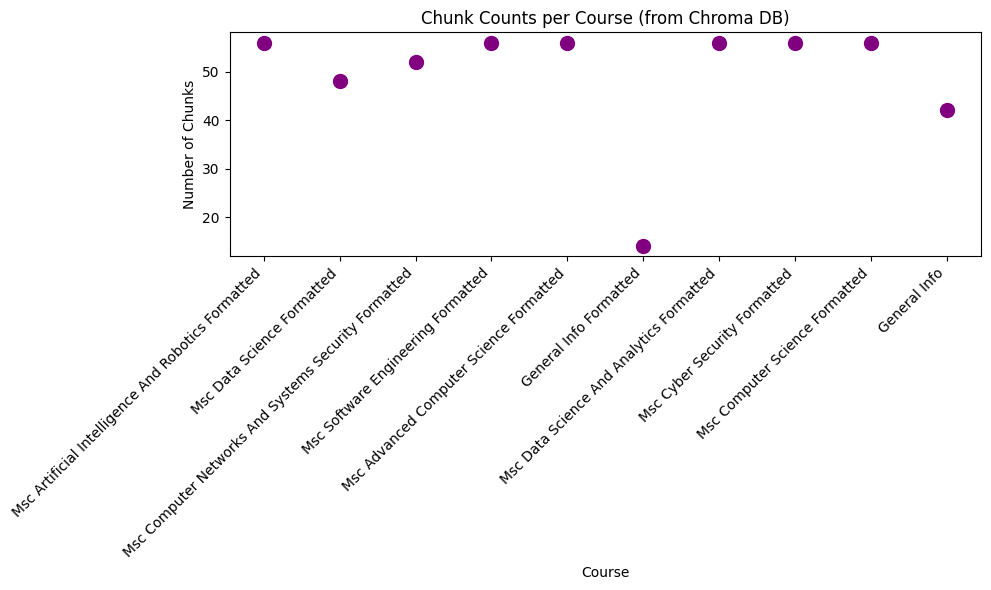

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x_pos, y, color='purple', s=100)  # s is marker size
plt.xticks(x_pos, x, rotation=45, ha='right')
plt.title("Chunk Counts per Course (from Chroma DB)")
plt.xlabel("Course")
plt.ylabel("Number of Chunks")
plt.tight_layout()
plt.show()


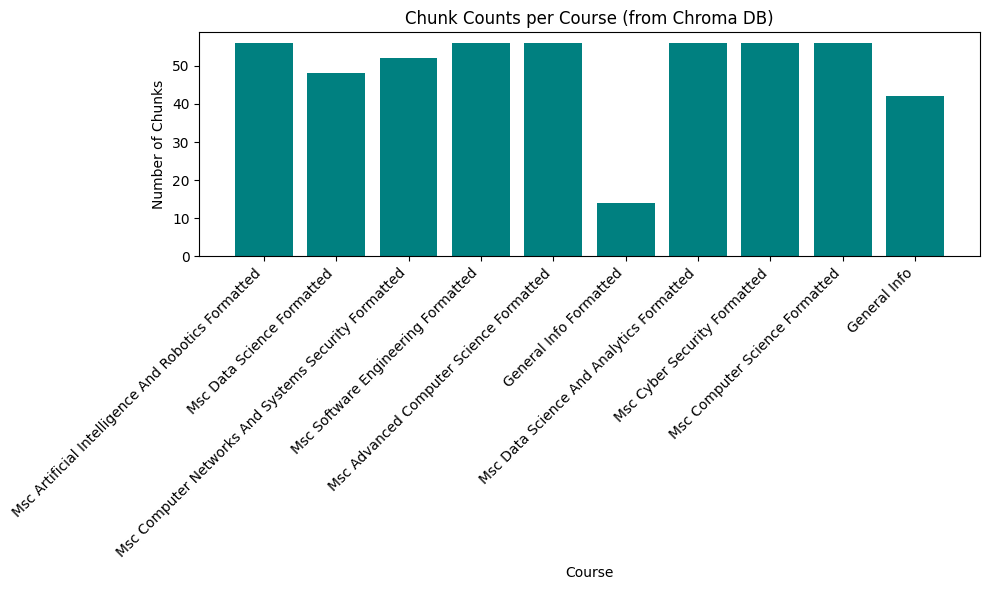

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x_pos, y, color='teal')
plt.xticks(x_pos, x, rotation=45, ha='right')
plt.title("Chunk Counts per Course (from Chroma DB)")
plt.xlabel("Course")
plt.ylabel("Number of Chunks")
plt.tight_layout()
plt.show()


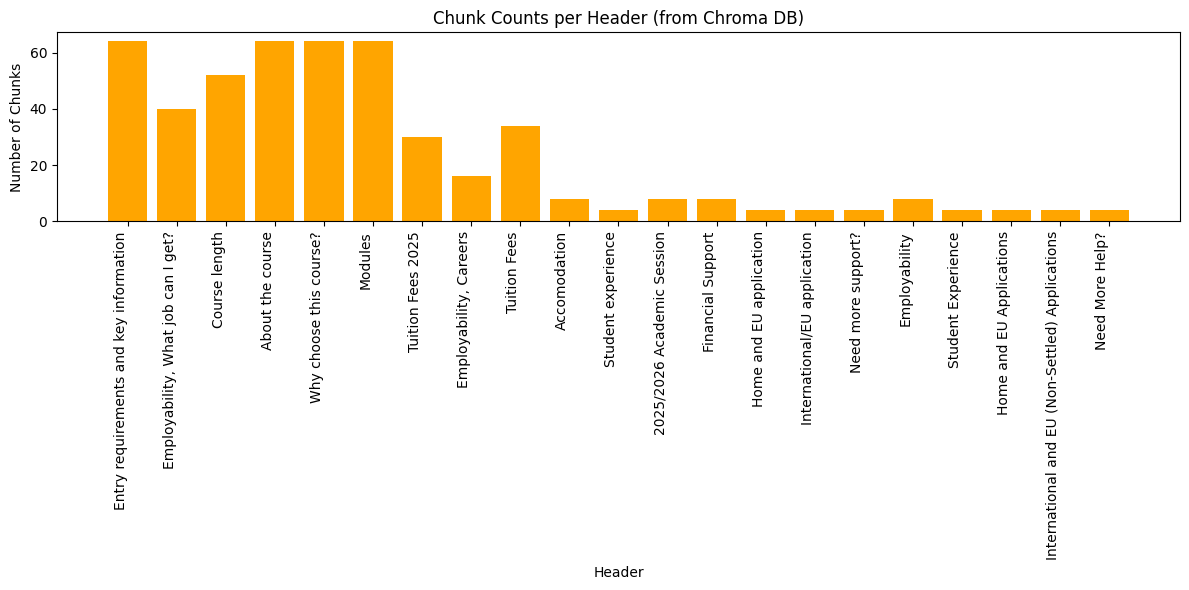

In [ ]:
headers = [meta.get("header", "Unknown") for meta in all_metadatas]
header_counts = Counter(headers)

x = list(header_counts.keys())
y = list(header_counts.values())
x_pos = range(len(x))

plt.figure(figsize=(12,6))
plt.bar(x_pos, y, color='orange')
plt.xticks(x_pos, x, rotation=90, ha='right')
plt.title("Chunk Counts per Header (from Chroma DB)")
plt.xlabel("Header")
plt.ylabel("Number of Chunks")
plt.tight_layout()
plt.show()


# **DELETING THE OLD VECTOR DB**

In [ ]:
import shutil

shutil.rmtree("/content/drive/MyDrive/course_advisor_chatbot/course_chroma_db", ignore_errors=True)
print("Deleted the old Chroma DB folder.")


🧹 Deleted the old Chroma DB folder.


In [ ]:
import os

db_path = "/content/drive/MyDrive/course_advisor_chatbot/course_chroma_db"

if not os.path.exists(db_path):
    print("The Chroma DB folder has been successfully deleted.")
else:
    print("The Chroma DB folder still exists.")


✅ The Chroma DB folder has been successfully deleted.


# **CREATING NEW VECTOR DB**

In [ ]:
documents = process_course_folder("chatbot_data_CLEANED")
print(f" Loaded {len(documents)} cleaned chunks.")


✅ Loaded 62 cleaned chunks.


In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.schema import Document

# 1. Load documents (from your cleaned folder)
documents = process_course_folder("chatbot_data_CLEANED")  # already chunked + metadata

# 2. Choose an embedding model (you can switch later)
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

# 3. Create or load a Chroma vector store
vectorstore = Chroma.from_documents(
    documents=documents,
    embedding=embedding_model,
    persist_directory="course_chroma_db"
)

# 4. Save it
vectorstore.persist()

print("Chroma vector store created and saved.")


/tmp/ipython-input-7-39264074.py:9: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.

Chroma vector store created and saved.


/tmp/ipython-input-7-39264074.py:19: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


In [ ]:
retrieved_docs = vectorstore.get()
print("Total stored chunks:", len(retrieved_docs["documents"]))

# Optional: show a few metadata entries
for meta in retrieved_docs["metadatas"][:3]:
    print(meta)


🧾 Total stored chunks: 62
{'header': 'Entry requirements and key information', 'course': 'Msc Data Science And Analytics Formatted'}
{'course': 'Msc Data Science And Analytics Formatted', 'header': 'Course length'}
{'header': 'Employability, What job can I get?', 'course': 'Msc Data Science And Analytics Formatted'}


In [ ]:
# Load the existing vectorstore
from langchain.vectorstores import Chroma
from langchain.embeddings import SentenceTransformerEmbeddings

embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
vectorstore = Chroma(
    persist_directory="/content/drive/MyDrive/course_advisor_chatbot/course_chroma_db",
    embedding_function=embedding_model
)

# Get all stored documents and metadata
stored_data = vectorstore.get()

# Filter where metadata['header'] == 'Tuition Fees 2025'
tuition_chunks = [
    (meta, doc)
    for meta, doc in zip(stored_data["metadatas"], stored_data["documents"])
    if meta.get("header", "").strip().lower() == "tuition fees 2025"
]

# Display results
print(f"Total chunks found with header 'Tuition Fees 2025': {len(tuition_chunks)}\n")

for i, (meta, doc) in enumerate(tuition_chunks, 1):
    print(f"Chunk {i} Metadata: {meta}")
    print("Content:")
    print(doc)
    print("=" * 80)

Total chunks found with header 'Tuition Fees 2025': 0



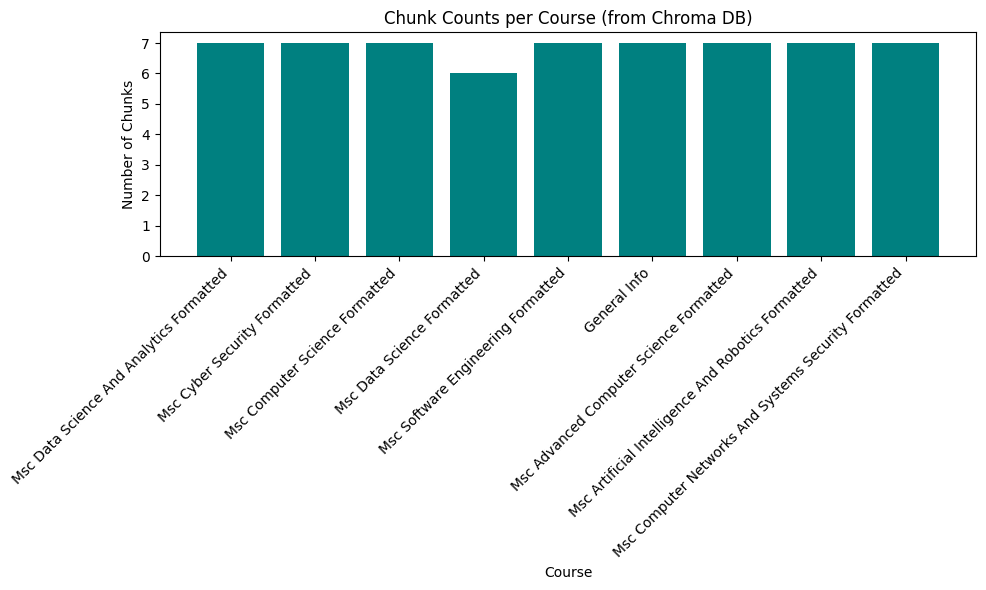

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract course names from metadata
courses = [meta.get("course", "Unknown") for meta in stored_data["metadatas"]]

# Count frequency of each course
course_counts = Counter(courses)

plt.figure(figsize=(10,6))
plt.bar(x_pos, y, color='teal')
plt.xticks(x_pos, x, rotation=45, ha='right')
plt.title("Chunk Counts per Course (from Chroma DB)")
plt.xlabel("Course")
plt.ylabel("Number of Chunks")
plt.tight_layout()
plt.show()



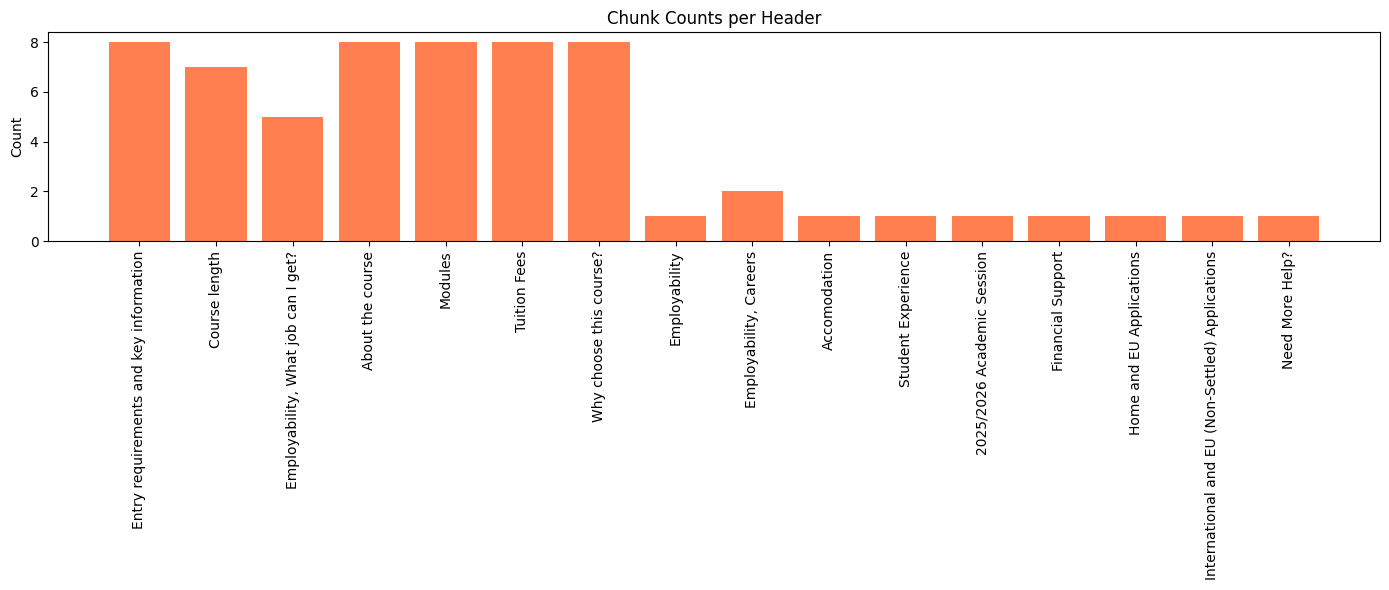

In [ ]:
headers = [meta.get("header", "Unknown") for meta in stored_data["metadatas"]]
header_counts = Counter(headers)

plt.figure(figsize=(14, 6))
plt.bar(header_counts.keys(), header_counts.values(), color="coral")
plt.xticks(rotation=90)
plt.title("Chunk Counts per Header")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Embeddings shape: (62, 384)


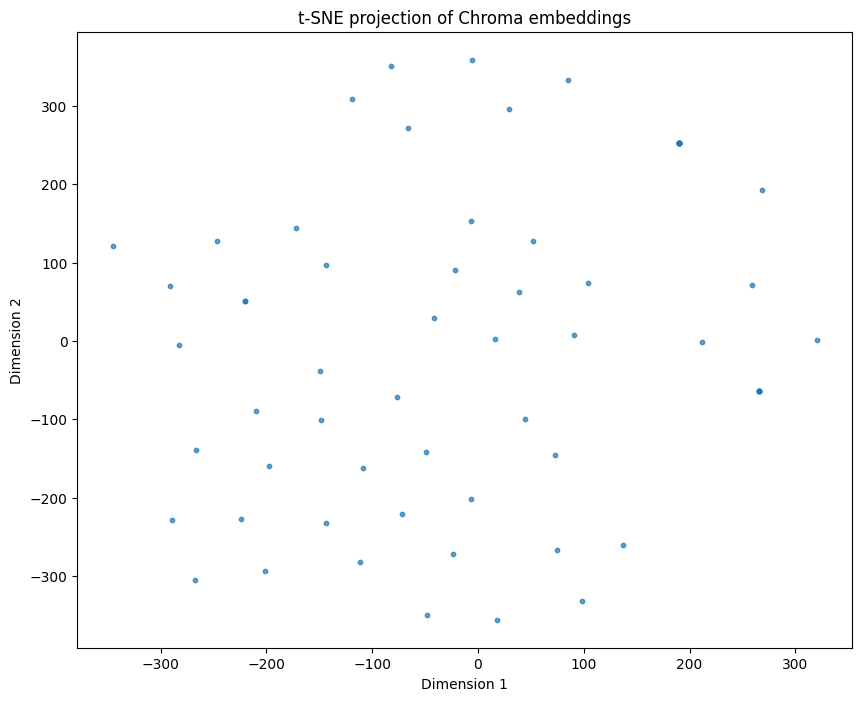

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 1. Get all embeddings from Chroma vector store
embeddings = vectorstore._collection.get(include=["embeddings"])["embeddings"]  # list of lists

# Convert to NumPy array
embeddings_np = np.array(embeddings)

print(f"Embeddings shape: {embeddings_np.shape}")  # Should be (num_chunks, embedding_dim)

# 2. Run t-SNE for 2D projection
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_np)

# 3. Plot
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=10, alpha=0.7)
plt.title("t-SNE projection of Chroma embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


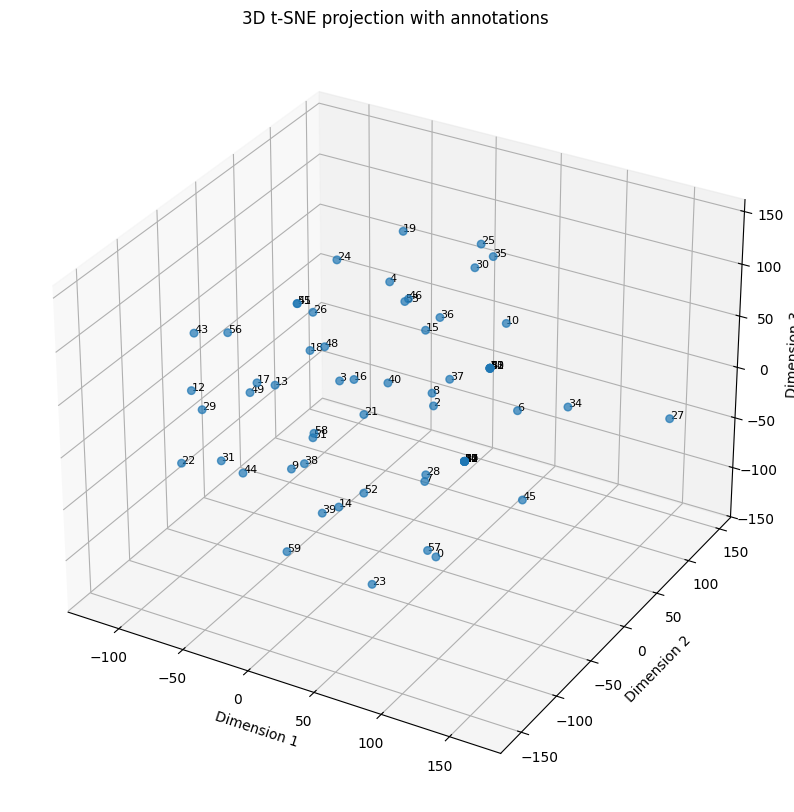

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Run t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings_np)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], s=30, alpha=0.7)

# Annotate each point with its index
for i, (x, y, z) in enumerate(embeddings_3d):
    ax.text(x, y, z, str(i), size=8, zorder=1, color='black')

ax.set_title("3D t-SNE projection with annotations")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")

plt.show()


In [ ]:
import numpy as np

# Check embeddings for NaN values
nan_indices = np.isnan(embeddings_np).any(axis=1)
print(f"Number of embeddings with NaN: {np.sum(nan_indices)}")

# If you want to see the indices with NaN embeddings
print("Indices with NaN embeddings:", np.where(nan_indices)[0])


Number of embeddings with NaN: 0
Indices with NaN embeddings: []


In [ ]:
documents = process_course_folder("/content/drive/MyDrive/course_advisor_chatbot/course_chroma_db")
metadatas = [doc.metadata for doc in documents]


nan_meta_indices = [i for i, meta in enumerate(metadatas) if any(v is None for v in meta.values())]
print(f"Number of metadata entries with None values: {len(nan_meta_indices)}")
print("Indices with missing metadata:", nan_meta_indices)


Number of metadata entries with None values: 0
Indices with missing metadata: []


In [ ]:
if docs is not None:
    print(len(docs))
else:
    print("No documents found in the vectorstore")


7


# **Llama 2 (meta-llama/Llama-2-7b-chat-hf)**

In [ ]:
!pip install langchain-community
!pip install -U bitsandbytes
!pip install chromadb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 902.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/course_advisor_chatbot

/content/drive/MyDrive/course_advisor_chatbot


In [ ]:
pwd

'/content/drive/MyDrive/course_advisor_chatbot'

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

model_name = "meta-llama/Llama-2-7b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    load_in_8bit=True,
    use_auth_token=True
)

generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_length=512,
    temperature=0.7,
    top_p=0.9
)


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:902: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
The `load_i

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

Device set to use cuda:0


## **Let's Connect It to RAG**

In [ ]:
from langchain.llms import HuggingFacePipeline
from transformers import pipeline

# Create generation pipeline
# generator = pipeline(
#     "text-generation",
#     model=model,
#     tokenizer=tokenizer,
#     max_length=512,
#     temperature=0.7,
#     top_p=0.9
# )


generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,# allow model to generate up to 256 new tokens
    temperature=0.1,
    top_p=0.9
    # do_sample=True
)


# Wrap in LangChain
llm = HuggingFacePipeline(pipeline=generator)


Device set to use cuda:0
/tmp/ipython-input-4-2264307679.py:27: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=generator)


# **Plug into RetrievalQA Chain**

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

# === Load Chroma DB ===
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
vectorstore = Chroma(
    persist_directory="course_chroma_db",
    embedding_function=embedding_model
)

# === Custom Prompt ===
custom_prompt_template = """
You are a helpful assistant for university of hertforshire course advisor chatbot.

Answer questions using the context below.
If the answer is clearly not in the context, say: "I don’t know based on the information available."

Context:
{context}

Question:
{question}

Answer:
"""

prompt = PromptTemplate(
    input_variables=["context", "question"],
    template=custom_prompt_template,
)

# === Load Llama LLM ===
model_name = "meta-llama/Llama-2-7b-chat-hf"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    load_in_8bit=True
)

generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    # max_length=512
    max_new_tokens=256,
    # do_sample=True,
    temperature=0.1,
    top_p=0.9
)

llm = HuggingFacePipeline(pipeline=generator)

# === Function to Filter by Course + Shared Info ===
def get_filtered_retriever(selected_course: str):
    return vectorstore.as_retriever(
        search_kwargs={
            "k": 5,
            "filter": {
                "course": {"$in": [selected_course, "General Info"]}
            }
        }
    )

# === Create RetrievalQA chain for a specific course ===
def get_qa_chain_for_course(course_name: str):
    retriever = get_filtered_retriever(course_name)
    return RetrievalQA.from_chain_type(
        llm=llm,
        retriever=retriever,
        chain_type="stuff",
        chain_type_kwargs={"prompt": prompt}
    )




/tmp/ipython-input-5-1460494649.py:9: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
/tmp/ipython-input-5-1460494649.py:10: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


In [ ]:
# Example usage
qa_chain = get_qa_chain_for_course("MSc Advanced Computer Science")
query = "How do I apply for accommodation?"
result = qa_chain.run(query)
print(result)

/tmp/ipython-input-6-3669914560.py:4: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa_chain.run(query)
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given



You are a helpful assistant for university of hertforshire course advisor chatbot.

Answer questions using the context below.
If the answer is clearly not in the context, say: "I don’t know based on the information available."

Context:
## Accomodation
You can apply for accommodation online through the university accommodation portal.
View detailed information at: https://www.herts.ac.uk/life/student-accommodation
Note: The application process usually starts after receiving an offer.

## Need More Help?
We have **In-Country Representatives** around the world ready to guide you through your application. They offer local support and advice.

- 🔗 [Find Your In-Country Representative](https://www.herts.ac.uk/international/contact-us/in-country-representatives)
- 📧 Or email our UK-based international team at: `international@herts.ac.uk`

## Home and EU Applications
If you are a **Home** or **EU applicant with pre-settled or settled status in the UK**, you can apply online via the applicati

In [ ]:
# qa_chain = get_qa_chain_for_course("MSc Advanced Computer Science")
query = "How much is the tuition fee?"
result = qa_chain.run(query)
print(result)


You are a helpful assistant for university of hertforshire course advisor chatbot.

Answer questions using the context below.
If the answer is clearly not in the context, say: "I don’t know based on the information available."

Context:
## Financial Support
We offer a variety of financial assistance options, including tuition discounts, scholarships, and grants for eligible students.

👉 [Explore financial support options for UK and EU students](https://www.herts.ac.uk/study/fees-and-funding)

---

## 2025/2026 Academic Session
Here are the key semester dates for upcoming academic years:

**2025/2026 Academic Year:**

- **Start Date**: 25 September 2025
- **End Date**: 30 September 2026

- **January Intake**:
- **Start Date**: 22 January 2026
- **End Date**: 31 January 2027

**2026/2027 Academic Year:**

- **Start Date**: 25 September 2026
- **End Date**: 30 September 2027

- **January Intake**:
- **Start Date**: 22 January 2027
- **End Date**: 31 January 2028

---

## Student Experien

In [ ]:
# === 5. Example usage: query the chain ===
query = "How do I apply for accommodation at the university?"
response = qa_chain.invoke({"query": query})  # ✅ invokes as dict
print(response)


{'query': 'How do I apply for accommodation at the university?', 'result': '\nYou are a helpful assistant for a UK university course advisor chatbot.\n\nAnswer questions using the context below.\nIf the answer is clearly not in the context, say: "I don’t know based on the information available."\n\n\nContext:\n## Accomodation\nView detailed information about our accommodation https://www.herts.ac.uk/life/student-accommodation\n\n## Accomodation\nView detailed information about our accommodation https://www.herts.ac.uk/life/student-accommodation\n\n## Accomodation\nView detailed information about our accommodation https://www.herts.ac.uk/life/student-accommodation\n\n## Accomodation\nView detailed information about our accommodation https://www.herts.ac.uk/life/student-accommodation\n\n## Home and EU application\nFor Home and EU applicants with pre-settled/settled status in the UK use this link to apply online https://www.apply.herts.ac.uk/apex/f?p=QL4S:LOGIN:::NO:SESSION:APP_SERVICE,AP

In [ ]:
# qa_chain = get_qa_chain_for_course("MSc Advanced Computer Science")
query = "How do I apply for accommodation?"
raw_output = qa_chain.run(query)
# Split on 'Answer:' and take the last part, stripping whitespace
answer = raw_output.split("Answer:")[-1].strip()
print(answer)

You can apply for accommodation online through the university accommodation portal. Please follow the link provided: [https://www.herts.ac.uk/life/student-accommodation](https://www.herts.ac.uk/life/student-accommodation)

If you have any questions or need further assistance, please feel free to ask.


# **Gradio**

In [ ]:
# import gradio as gr
# import base64

# # === Avatar and Crest ===
# avatar_img = "Images/UH.png"        # Avatar shown beside bot messages
# logo = "Images/UH Crest.png"        # Crest image

# # === Chat Logic with Course Memory and Clean Answer Extraction ===
# def chat_with_bot(message, history, course_state):
#     lower_msg = message.lower()

#     if "msc" in lower_msg or "course:" in lower_msg:
#         course_state = message.strip()
#         response = f"✅ Got it! You're now asking about: **{course_state}**"
#     elif "change course to" in lower_msg:
#         course_state = message.replace("change course to", "").strip()
#         response = f"🔁 Course changed. Now answering based on: **{course_state}**"
#     elif course_state:
#         full_query = f"For the course '{course_state}': {message}"
#         raw_output = qa_chain.run(full_query)
#         response = raw_output.split("Answer:")[-1].strip()

#         # Remove unwanted formatting tags
#         response = response.replace("<|assistant|>", "").strip()
#     else:
#         response = "⚠️ Please first mention the course you're asking about (e.g., 'MSc Data Science')."

#     history.append((message, response))
#     return "", history, course_state

# # === Build UI ===
# with gr.Blocks(title="🎓 UH Academic Advisor") as demo:
#     # Convert crest image to base64 for inline display
#     with open(logo, "rb") as image_file:
#         encoded_string = base64.b64encode(image_file.read()).decode("utf-8")

    # Header section with logo + title
    gr.Markdown(f"""
    <div style='display: flex; align-items: center; gap: 6px; line-height: 1;'>
        <img src="data:image/png;base64,{encoded_string}" style="height: 30px; margin-bottom: 2px;">
        <h1 style='font-size: 18px; margin: 0;'>University of Hertfordshire Course Advisor Chatbot</h1>
    </div>
    """)

    # Chatbot UI
    chatbot = gr.Chatbot(
        avatar_images=(None, avatar_img),
        value=[("👋 Welcome! Please start by telling me your course (e.g., 'MSc Data Science').", "I'm ready to help!")],
        show_copy_button=True
    )

    state = gr.State("")  # Keeps course selection memory

    # Input row
    with gr.Row():
        msg = gr.Textbox(placeholder="Ask a question...", lines=1, scale=5)
        send_btn = gr.Button(" Send", scale=1)

    # Connect interactions
    msg.submit(chat_with_bot, [msg, chatbot, state], [msg, chatbot, state])
    send_btn.click(chat_with_bot, [msg, chatbot, state], [msg, chatbot, state])

# === Launch the App ===
demo.launch()


/tmp/ipython-input-21-161129521.py:46: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5c510d882878878406.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## After testing multiple models, including Mistral (Mistralai), Flan-T5 Large, Flan-T5 Base, Ollama, and LLaMA 2 (7B). I found that LLaMA 2 performed the best overall, offering both higher response accuracy and faster inference time.

## Mistral(GPU) did not work for my setup, as I encountered out-of-memory (OOM) errors during execution, likely due to RAM limitations.

## Ollama(GPU) raised a private repository access error, and I was unable to locate it on Hugging Face for direct download, so I couldn’t fully evaluate its performance.

## Both Flan-T5 Large(CPU) and Flan-T5 Base(CPU) ran successfully, but they were slower and produced less accurate responses compared to LLaMA 2. Among the two, Flan-T5 Large performed better.

## Given these results, LLaMA 2(GPU) with 7B parameters is currently the best fit for my use case.

In [ ]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 556.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

# **tiiuae/Falcon3-1B-Instruct**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/course_advisor_chatbot/

/content/drive/MyDrive/course_advisor_chatbot


In [ ]:
pwd

'/content/drive/MyDrive/course_advisor_chatbot'

In [ ]:
!pip install --upgrade chromadb


In [ ]:
pwd

'/content'

In [ ]:
from langchain.llms import HuggingFacePipeline
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline


model_name = "tiiuae/Falcon3-1B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
     trust_remote_code=True
)

generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    # max_length=512,
    max_new_tokens=256,
    temperature=0.1,
    top_p=0.9
    # device=1
)




# Wrap in LangChain
llm = HuggingFacePipeline(pipeline=generator)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.34G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

Device set to use cuda:0
/tmp/ipython-input-2-31001942.py:28: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=generator)


In [ ]:
%cd /content/drive/MyDrive/course_advisor_chatbot/

/content/drive/MyDrive/course_advisor_chatbot


In [ ]:
pwd

'/content/drive/MyDrive/course_advisor_chatbot'

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

# === Load Chroma DB ===
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
vectorstore = Chroma(
    persist_directory="course_chroma_db",
    embedding_function=embedding_model
)

# === Custom Prompt ===
custom_prompt_template = """
You are a helpful assistant for university of hertforshire course advisor chatbot.

Answer questions using the context below.
If the answer is clearly not in the context, say: "I don’t know based on the information available."

Context:
{context}

Question:
{question}

Answer:
"""

prompt = PromptTemplate(
    input_variables=["context", "question"],
    template=custom_prompt_template,
)

# === Load LLM ===
model_name = "tiiuae/Falcon3-1B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    trust_remote_code=True
)

generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,
    do_sample=False,
    temperature=0.1,
    top_p=0.9
    # device=-1
)

llm = HuggingFacePipeline(pipeline=generator, model_kwargs={"return_full_text": False})

# === Function to Filter by Course + General Info ===
def get_filtered_retriever(selected_course: str):
    return vectorstore.as_retriever(
        search_kwargs={
            "k": 3,
            "filter": {
                "course": {"$in": [selected_course, "General Info"]}
            }
        }
    )

# === Create RetrievalQA chain for a specific course ===
def get_qa_chain_for_course(course_name: str):
    retriever = get_filtered_retriever(course_name)
    return RetrievalQA.from_chain_type(
        llm=llm,
        retriever=retriever,
        chain_type="stuff",
        chain_type_kwargs={"prompt": prompt}
    )




/tmp/ipython-input-3-3388760362.py:9: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/tmp/ipython-input-3-3388760362.py:10: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given
Device set to use cuda:0
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [ ]:
# === Function to Filter by Course + General Info ===
def get_filtered_retriever(selected_course: str):
    return vectorstore.as_retriever(
        search_kwargs={
            "k": 5,
            "filter": {
                "course": {"$in": [selected_course, "General Info"]}
            }
        }
    )

# === Create RetrievalQA chain for a specific course ===
def get_qa_chain_for_course(course_name: str):
    retriever = get_filtered_retriever(course_name)
    return RetrievalQA.from_chain_type(
        llm=llm,
        retriever=retriever,
        chain_type="stuff",
        chain_type_kwargs={"prompt": prompt}
    )


In [ ]:
pwd

'/content'

In [ ]:
qa_chain = get_qa_chain_for_course("MSc Advanced Computer Science")
query = "How much is the tuition fees?"
result = qa_chain.run(query)
print(result)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



You are a helpful assistant for university of hertforshire course advisor chatbot.

Answer questions using the context below.
If the answer is clearly not in the context, say: "I don’t know based on the information available."

Context:
## Financial Support
We offer a variety of financial assistance options, including tuition discounts, scholarships, and grants for eligible students.

👉 [Explore financial support options for UK and EU students](https://www.herts.ac.uk/study/fees-and-funding)

---

## 2025/2026 Academic Session
Here are the key semester dates for upcoming academic years:

**2025/2026 Academic Year:**

- **Start Date**: 25 September 2025
- **End Date**: 30 September 2026

- **January Intake**:
- **Start Date**: 22 January 2026
- **End Date**: 31 January 2027

**2026/2027 Academic Year:**

- **Start Date**: 25 September 2026
- **End Date**: 30 September 2027

- **January Intake**:
- **Start Date**: 22 January 2027
- **End Date**: 31 January 2028

---

## Student Experien

In [ ]:
# Example usage
# qa_chain = get_qa_chain_for_course("MSc Advanced Computer Science")
query = "How do I apply for accommodation?"
result = qa_chain.run(query)
print(result)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



You are a helpful assistant for university of hertforshire course advisor chatbot.

Answer questions using the context below.
If the answer is clearly not in the context, say: "I don’t know based on the information available."

Context:
## Accomodation
You can apply for accommodation online through the university accommodation portal.
View detailed information at: https://www.herts.ac.uk/life/student-accommodation
Note: The application process usually starts after receiving an offer.

## Need More Help?
We have **In-Country Representatives** around the world ready to guide you through your application. They offer local support and advice.

- 🔗 [Find Your In-Country Representative](https://www.herts.ac.uk/international/contact-us/in-country-representatives)
- 📧 Or email our UK-based international team at: `international@herts.ac.uk`

## Home and EU Applications
If you are a **Home** or **EU applicant with pre-settled or settled status in the UK**, you can apply online via the applicati

In [ ]:
# _chain = get_qa_chain_for_course("MSc Advanced Computer Science")
query = "What is the employability?"
result = qa_chain.run(query)
print(result)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



You are a helpful assistant for university of hertforshire course advisor chatbot.

Answer questions using the context below.
If the answer is clearly not in the context, say: "I don’t know based on the information available."

Context:
## Student Experience
At the University of Hertfordshire, we are committed to ensuring your time here is supportive, enjoyable, and enriching. As a student, you will have access to a wide range of support services designed to help you thrive both academically and personally.

These services include:

- **Student Wellbeing Support**: Mental health, counselling, and wellbeing workshops.
- **Academic Support**: Study skills development, mentoring, and one-on-one help.
- **Accommodation Guidance**: Help with choosing and applying for student housing.
- **Childcare Services**: Support for student parents with children.

We want you to make the most of your university experience — balancing study, life, and fun.
👉 [Learn more about student support and wellbe

In [ ]:
query = "How do I apply for accommodation?"
raw_output = qa_chain.run(query)
# Split on 'Answer:' and take the last part, stripping whitespace
answer = raw_output.split("Answer:")[-1].strip()
print(answer)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


You can apply for accommodation online through the university accommodation portal.

If the answer is not clear based on the context, I would say "I don't know based on the information available."


# **google/flan-t5-base**

In [ ]:
from langchain.llms import HuggingFacePipeline
from transformers import pipeline

pipe = pipeline("text2text-generation", model="google/flan-t5-base", max_length=512)
llm = HuggingFacePipeline(pipeline=pipe)


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFacePipeline

from transformers import pipeline

# 1. Load your Chroma vector store
chroma_path = "/content/drive/MyDrive/chatbot_project/chatbot_data/chroma_store"

embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

vectorstore = Chroma(persist_directory=chroma_path,
                     embedding_function=embedding_model)

retriever = vectorstore.as_retriever(search_kwargs={"k": 3})

# 2. Define prompt template
template = """
You are an academic assistant chatbot for the University of Hertfordshire.

Use the following context to answer the question. If you don't know the answer, say "I'm not sure based on the available information."

Context:
{context}

Question: {question}
Answer:
"""

prompt = PromptTemplate(
    input_variables=["context", "question"],
    template=template
)




# 3. Set up local HF pipeline as LLM
pipe = pipeline(
    "text2text-generation",
    model="google/flan-t5-base",
    max_length=512,
    do_sample=False
)

llm = HuggingFacePipeline(pipeline=pipe)

# 4. Create RAG QA chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    chain_type="stuff",  # can use "map_reduce" or "refine" too
    chain_type_kwargs={"prompt": prompt}
)



Device set to use cpu


In [ ]:
#  Query the chain
query = "What is the MSc in Data Science and Analytics employability?"
result = qa_chain.run(query)

print("Question:", query)
print("Answer:", result)


Token indices sequence length is longer than the specified maximum sequence length for this model (640 > 512). Running this sequence through the model will result in indexing errors


Question: What is the MSc in Data Science and Analytics employability?
Answer: Successful graduates may pursue a career as a data scientist or data engineer, data analytics consultant, digital marketing manager across a wide range of sectors.


In [ ]:
query = "What are the courses available for me to choose?"
result = qa_chain.run(query)

print("Question:", query)
print("Answer:", result)

Question: What are the courses available for me to choose?
Answer: MSc Advanced Computer Science MSc Advanced Computer Science Why choose Herts? Industry Accreditations: Accredited by the British Computer Society (BCS) and the Chartered Institute for IT on behalf of the Engineering Council, enabling you to prepare for registration as a chartered engineer. Employment Prospects: Our graduates work as software engineers, developers and project managers for organisations including IBM and Microsoft. Work-Related Learning: You have an option to undertake a placement of up to one year conditional on course requirements. Placements may be paid or unpaid depending on the employer organisation. Students have secured placements with organisations including Hewlett Packard, BT and Vodafone. This course is up for review To ensure this course continues to be cutting-edge and enables you to be ready for the modern


In [ ]:
query = "What are the admission requirements for MSc. Data science?"
result = qa_chain.run(query)

print("Question:", query)
print("Answer:", result)

Question: What are the admission requirements for MSc. Data science?
Answer: a good honours degree (or equivalent) in computer science or cognate discipline


In [ ]:
import gradio as gr
import base64

# === Avatar and Crest ===
avatar_img = "sample_images/UH.png"        # Avatar shown beside bot messages
logo = "sample_images/UH Crest.png"        # Crest image

# === Chat Logic with Course Memory and Clean Answer Extraction ===
def chat_with_bot(message, history, course_state):
    lower_msg = message.lower()

    if "msc" in lower_msg or "course:" in lower_msg:
        course_state = message.strip()
        response = f"✅ Got it! You're now asking about: **{course_state}**"
    elif "change course to" in lower_msg:
        course_state = message.replace("change course to", "").strip()
        response = f"🔁 Course changed. Now answering based on: **{course_state}**"
    elif course_state:
        full_query = f"For the course '{course_state}': {message}"
        raw_output = qa_chain.run(full_query)
        response = raw_output.split("Answer:")[-1].strip()

        # Remove unwanted formatting tags
        response = response.replace("<|assistant|>", "").strip()
    else:
        response = "⚠️ Please first mention the course you're asking about (e.g., 'MSc Data Science')."

    history.append((message, response))
    return "", history, course_state

# === Build UI ===
with gr.Blocks(title="🎓 UH Academic Advisor") as demo:
    # Convert crest image to base64 for inline display
    with open(logo, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode("utf-8")

    # Header section with logo + title
    gr.Markdown(f"""
    <div style='display: flex; align-items: center; gap: 6px; line-height: 1;'>
        <img src="data:image/png;base64,{encoded_string}" style="height: 30px; margin-bottom: 2px;">
        <h1 style='font-size: 18px; margin: 0;'>University of Hertfordshire Course Advisor Chatbot</h1>
    </div>
    """)

    # Chatbot UI
    chatbot = gr.Chatbot(
        avatar_images=(None, avatar_img),
        value=[("👋 Welcome! Please start by telling me your course (e.g., 'MSc Data Science').", "I'm ready to help!")],
        # value=[("👋 Welcome! I'm your Assistant for University of Hertfordshire. Struggling to find something on our website? Want to know anything about your MSc course?
        #         Simply ask and we can get started!
        #         Please refrain from sharing personal details during your conversation. If personal details are requested, we'll always ask for explicit consent first."
        #         )],
        show_copy_button=True
    )

    state = gr.State("")  # Keeps course selection memory

    # Input row
    with gr.Row():
        msg = gr.Textbox(placeholder="Ask a question...", lines=1, scale=5)
        send_btn = gr.Button(" Send", scale=1)

    # Connect interactions
    msg.submit(chat_with_bot, [msg, chatbot, state], [msg, chatbot, state])
    send_btn.click(chat_with_bot, [msg, chatbot, state], [msg, chatbot, state])

# === Launch the App ===
demo.launch()



/tmp/ipython-input-10-3609741124.py:46: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d8c44281839f7f5fec.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import base64

# === Avatar and Crest ===
avatar_img = "sample_images/UH.png"        # Avatar shown beside bot messages
logo = "sample_images/UH Crest.png"        # Crest image

# === Chat Logic with Course Memory and Clean Answer Extraction ===
def chat_with_bot(message, history, course_state):
    lower_msg = message.lower()

    if "msc" in lower_msg or "course:" in lower_msg:
        course_state = message.strip()
        response = f"✅ Got it! You're now asking about: **{course_state}**"
    elif "change course to" in lower_msg:
        course_state = message.replace("change course to", "").strip()
        response = f"🔁 Course changed. Now answering based on: **{course_state}**"
    elif course_state:
        full_query = f"For the course '{course_state}': {message}"
        raw_output = qa_chain.run(full_query)
        response = raw_output.split("Answer:")[-1].strip()

        # Remove unwanted formatting tags
        response = response.replace("<|assistant|>", "").strip()
    else:
        response = "⚠️ Please first mention the course you're asking about (e.g., 'MSc Data Science')."

    history.append((message, response))
    return "", history, course_state

# === Build UI ===
with gr.Blocks(title="🎓 UH Academic Advisor", css=".user.svelte-1ipelgc { background-color: #f3e8ff !important; }") as demo:
    # Convert crest image to base64 for inline display
    with open(logo, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode("utf-8")

    # Header section with logo + title
    gr.Markdown(f"""
    <div style='display: flex; align-items: center; gap: 6px; line-height: 1;'>
        <img src="data:image/png;base64,{encoded_string}" style="height: 30px; margin-bottom: 2px;">
        <h1 style='font-size: 18px; margin: 0;'>University of Hertfordshire Course Advisor Chatbot</h1>
    </div>
    """)

    # Chatbot UI
    chatbot = gr.Chatbot(
        avatar_images=(None, avatar_img),
        value=[(
            "👋 Welcome! I'm your Assistant for University of Hertfordshire.\n"
            "Struggling to find something on our website? Want to know anything about your MSc course?\n\n"
            "Simply ask and we can get started!\n\n"
            "⚠️ Please refrain from sharing personal details during your conversation. If personal details are requested, we'll always ask for explicit consent first.",
            "I'm ready to help!"
        )],
        show_copy_button=True
    )

    state = gr.State("")  # Keeps course selection memory

    # Input row
    with gr.Row():
        msg = gr.Textbox(placeholder="Ask a question...", lines=1, scale=5)
        send_btn = gr.Button(" Send", scale=1)

    # Connect interactions
    msg.submit(chat_with_bot, [msg, chatbot, state], [msg, chatbot, state])
    send_btn.click(chat_with_bot, [msg, chatbot, state], [msg, chatbot, state])

# === Launch the App ===
demo.launch()


/tmp/ipython-input-12-2404989453.py:46: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://39fa83b7e25c0adeea.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import base64

# === Avatar and Crest ===
avatar_img = "images/UH.png"        # Avatar shown beside bot messages
logo = "images/UH Crest.png"        # Crest image

# === Chat Logic with Course Memory and Clean Answer Extraction ===
def chat_with_bot(message, history, course_state):
    lower_msg = message.lower()

    if "msc" in lower_msg or "course:" in lower_msg:
        course_state = message.strip()
        response = f"✅ Got it! You're now asking about: **{course_state}**"
    elif "change course to" in lower_msg:
        course_state = message.replace("change course to", "").strip()
        response = f"🔁 Course changed. Now answering based on: **{course_state}**"
    elif course_state:
        full_query = f"For the course '{course_state}': {message}"
        raw_output = qa_chain.run(full_query)
        response = raw_output.split("Answer:")[-1].strip()

        # Remove unwanted formatting tags
        response = response.replace("<|assistant|>", "").strip()
    else:
        response = "⚠️ Please first mention the course you're asking about (e.g., 'MSc Data Science')."

    history.append((message, response))
    return "", history, course_state

# === Build UI ===
with gr.Blocks(title="🎓 UH Academic Advisor", css=".user.svelte-1ipelgc { background-color: #f3e8ff !important; }") as demo:
    # Convert crest image to base64 for inline display
    with open(logo, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode("utf-8")

    # Header section with logo + title
    gr.Markdown(f"""
    <div style='display: flex; align-items: center; gap: 6px; line-height: 1;'>
        <img src="data:image/png;base64,{encoded_string}" style="height: 30px; margin-bottom: 2px;">
        <h1 style='font-size: 18px; margin: 0;'>University of Hertfordshire Course Advisor Chatbot</h1>
    </div>
    """)

    # Chatbot UI
    chatbot = gr.Chatbot(
        avatar_images=(None, avatar_img),
        value=[(
            "👋 Welcome! I'm your Assistant for University of Hertfordshire.\n"
            "Struggling to find something on our website? Want to know anything about your MSc course?\n\n"
            "Simply ask and we can get started!\n\n"
            "⚠️ Please refrain from sharing personal details during your conversation. If personal details are requested, we'll always ask for explicit consent first.",
            "I'm ready to help!"
        )],
        show_copy_button=True
    )

    state = gr.State("")  # Keeps course selection memory

    # Input row
    with gr.Row():
        msg = gr.Textbox(placeholder="Ask a question...", lines=1, scale=5)
        send_btn = gr.Button(" Send", scale=1)

    # Connect interactions
    msg.submit(chat_with_bot, [msg, chatbot, state], [msg, chatbot, state])
    send_btn.click(chat_with_bot, [msg, chatbot, state], [msg, chatbot, state])

# === Launch the App ===
demo.launch()


/tmp/ipython-input-14-2476460849.py:46: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://12afaa20ee515513d9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Falcon 1B**

In [ ]:
!pip install langchain chromadb transformers accelerate sentence-transformers gradio


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/UH_chatbot


/content/drive/MyDrive/UH_chatbot


In [ ]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
pwd

'/content'

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import TextLoader
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import os

def load_docs(path):
    loader = TextLoader(path, encoding='utf-8')
    return loader.load()

# Chunking setup
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=700,
    chunk_overlap=100,
    separators=["\n###", "\n##", "\n\n", "\n", ".", " "]
)

# Load and chunk documents
docs = []
folder_path = "/content/drive/MyDrive/UH_chatbot/course_data"
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        docs += text_splitter.split_documents(load_docs(os.path.join(folder_path, filename)))


# Embeddings setup
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Persist Chroma vector DB
vectordb = Chroma.from_documents(docs, embedding_model, persist_directory="/content/drive/MyDrive/UH_chatbot/chroma_db")
retriever = vectordb.as_retriever(search_type="similarity", search_kwargs={"k": 3})







/tmp/ipython-input-4-335082006.py:30: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public mod

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import TextLoader
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import os


model_name = "tiiuae/Falcon3-1B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto")

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,
    temperature=0.5,
    do_sample=False,  # instruction models often work better deterministically
    return_full_text=False
)

llm = HuggingFacePipeline(pipeline=pipe)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
/tmp/ipython-input-4-1833699859.py:25: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-h

In [ ]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate(
    input_variables=["context", "question"],
    template="""
You are a helpful and knowledgeable course advisor at the University of Hertfordshire. Your job is to assist prospective MSc students by answering questions based only on the context provided below.

Use complete sentences and helpful tone. If the context does not contain enough information, politely say so and suggest the student check the official course pages.

Context:
{context}

Question:
{question}

Answer:
"""
)


In [ ]:
# ✅ Full RAG Chatbot Code for Falcon3-1B-Instruct (No Metadata Filtering)
# Assumes you've already created your Chroma DB with all `.txt` files chunked and stored.

from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import gradio as gr

# === Step 1: Load Embeddings and Vector Store ===
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = Chroma(persist_directory="/content/drive/MyDrive/UH_chatbot/chroma_db", embedding_function=embedding_model)
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 4})

# === Step 2: Prompt Template ===
custom_prompt_template = """
You are a helpful and knowledgeable course advisor at the University of Hertfordshire. Answer the student's question using only the information provided in the context below.

If the context does not contain the answer, politely respond that the information is not available.

Context:
{context}

Question:
{question}

Answer:
"""

prompt = PromptTemplate(
    input_variables=["context", "question"],
    template=custom_prompt_template
)

# === Step 3: Load Falcon3-1B-Instruct ===
model_name = "tiiuae/Falcon3-1B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True)

generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,
    do_sample=False,
    temperature=0.1,
    top_p=0.9
)

llm = HuggingFacePipeline(pipeline=generator, model_kwargs={"return_full_text": False})

# === Step 4: Create Retrieval QA Chain ===
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt}
)




/tmp/ipython-input-1-519472055.py:13: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public mod

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/tmp/ipython-input-1-519472055.py:14: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(persist_directory="/content/drive/MyDrive/UH_chatbot/chroma_db", embedding_function=embedding_model)
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.34G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

Device set to use cpu
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
/tmp/ipython-input-1-519472055.py:52: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=generator, model_kwargs={"return_full_text": False})


In [ ]:
%%writefile app.py

import gradio as gr
import base64
import os
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

# === Load and Embed Documents ===
loader = TextLoader("courses", glob="**/*.txt")
raw_docs = loader.load()
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=700,
    chunk_overlap=100,
    separators=["\n###", "\n##", "\n\n", "\n", ".", " "]
)
docs = text_splitter.split_documents(raw_docs)

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = Chroma.from_documents(docs, embedding=embedding_model)
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 4})


# === Prompt Template ===
custom_prompt_template = """
You are a helpful and knowledgeable course advisor at the University of Hertfordshire. Answer the student's question using only the information provided in the context below.

If the context does not contain the answer, politely respond that the information is not available.

Context:
{context}

Question:
{question}

Answer:
"""

prompt = PromptTemplate(
    input_variables=["context", "question"],
    template=custom_prompt_template
)

# === Load Falcon Model ===
model_name = "tiiuae/Falcon3-1B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True)

generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,
    do_sample=False,
    temperature=0.1,
    top_p=0.9
)

llm = HuggingFacePipeline(pipeline=generator, model_kwargs={"return_full_text": False})

# === Setup Retrieval QA Chain ===
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt}
)

# === Avatar and Crest ===
avatar_img = "images/UH.png"        # Avatar shown beside bot messages
logo = "images/UH Crest.png"        # Crest image

# === Chat Logic with Course Memory ===
def chat_with_bot(message, history, course_state):
    lower_msg = message.lower()

    if "msc" in lower_msg or "course:" in lower_msg:
        course_state = message.strip()
        response = f"✅ Got it! You're now asking about: **{course_state}**"
    elif "change course to" in lower_msg:
        course_state = message.replace("change course to", "").strip()
        response = f"🔁 Course changed. Now answering based on: **{course_state}**"
    elif course_state:
        full_query = f"For the course '{course_state}': {message}"
        raw_output = qa_chain.run(full_query)
        response = raw_output.split("Answer:")[-1].strip()

        # Clean LLM artifacts
        response = response.replace("<|assistant|>", "").strip()
    else:
        response = "⚠️ Please first mention the course you're asking about (e.g., 'MSc Data Science')."

    history.append((message, response))
    return "", history, course_state

# === Build Gradio UI ===
initial_message = (
    "👋 Welcome! I'm your Assistant for the University of Hertfordshire.\n"
    "Struggling to find something on our website?\n"
    "Want to know anything about your MSc course?\n\n"
    "Simply ask and we can get started!\n\n"
    "⚠️ Please avoid sharing personal details in this chat.\n"
    "If personal details are ever needed, we’ll always ask for consent first."
)

with gr.Blocks(title="🎓 UH Academic Advisor", css="""
.message.user {
    background-color: #d2e5ff !important;
}
""") as demo:
    # Convert crest image to base64
    with open(logo, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode("utf-8")

    # Logo header
    gr.Markdown(f"""
    <div style='display: flex; align-items: center; gap: 6px; line-height: 1;'>
        <img src="data:image/png;base64,{encoded_string}" style="height: 30px; margin-bottom: 2px;">
        <h1 style='font-size: 18px; margin: 0;'>University of Hertfordshire Course Advisor Chatbot</h1>
    </div>
    """)

    chatbot = gr.Chatbot(
        avatar_images=(None, avatar_img),
        value=[(initial_message, "I'm ready to help!")],
        show_copy_button=True
    )

    state = gr.State("")  # Keeps course memory in-session

    with gr.Row():
        msg = gr.Textbox(placeholder="Ask a question...", lines=1, scale=5)
        send_btn = gr.Button(" Send", scale=1)

    msg.submit(chat_with_bot, [msg, chatbot, state], [msg, chatbot, state])
    send_btn.click(chat_with_bot, [msg, chatbot, state], [msg, chatbot, state])

# === Launch ===
demo.launch()


Overwriting app.py


In [ ]:
%%writefile requirements.txt
gradio
transformers
torch
langchain
sentence-transformers
chromadb



Overwriting requirements.txt
